In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [93]:
df = pd.read_csv(r"C:\Users\BR- PROCUREMENT\Downloads\ifood_df.csv")
df

pd.reset_option('display.max_rows')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [7]:
df.isnull().sum()    

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

#### combine Marital Status and Educational Level to one column 

In [97]:
df['Marital Status'] = df[['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow']].idxmax(axis=1)
df['Educational Level'] = df[['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']].idxmax(axis=1)

In [99]:
label_encoder = LabelEncoder()
df['marital_status'] = label_encoder.fit_transform (df['Marital Status']) 
df['educational_level'] = label_encoder.fit_transform (df['Educational Level'])
df



,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital Status,Educational Level,marital_status,educational_level
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,1529,1441,0,marital_Single,education_Graduation,2,2
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,21,15,0,marital_Single,education_Graduation,2,2
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,734,692,0,marital_Together,education_Graduation,3,2
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,48,43,0,marital_Together,education_Graduation,3,2
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,407,392,0,marital_Married,education_PhD,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,1,0,0,1094,847,0,marital_Married,education_Graduation,1,2
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,1,436,428,1,marital_Together,education_PhD,3,4
2202,56981.0,0,0,91,908,48,217,32,12,24,...,1,0,0,1217,1193,1,marital_Divorced,education_Graduation,0,2
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,1,0,782,721,0,marital_Together,education_Master,3,3


# EDA

In [9]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,educational_level
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932,1.730612,2.392744
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044,1.062046,1.121859
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000,0.000000,0.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000,1.000000,2.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000,2.000000,2.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000,3.000000,3.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000,4.000000,4.000000


In [12]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

### Spending Across Production Category

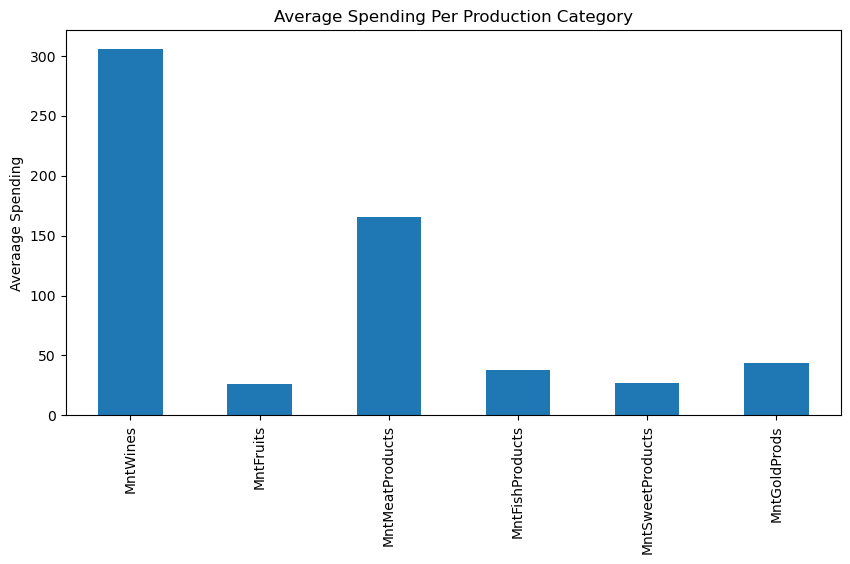

In [11]:
categories = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

df [categories].mean(). plot(kind='bar', figsize=(10,5))
plt.title('Average Spending Per Production Category')
plt.ylabel('Averaage Spending')
plt.show()

### Customer Engagement With Campaigns

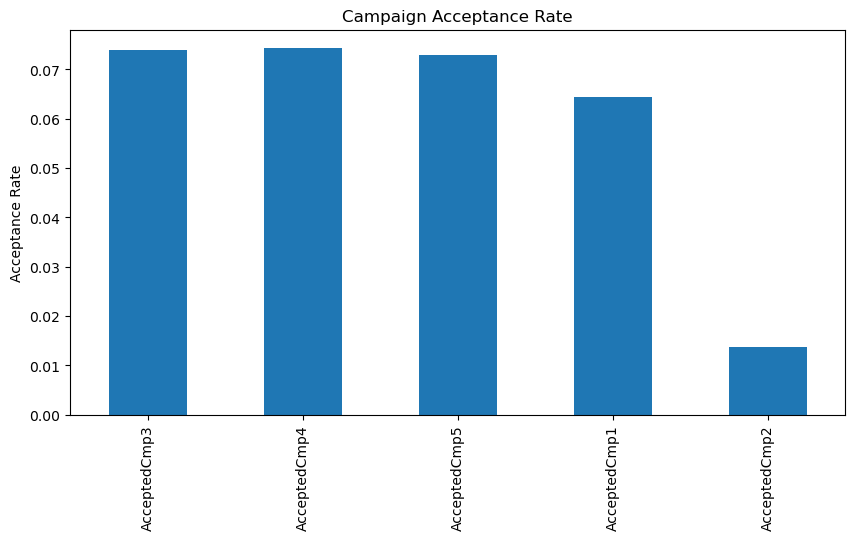

In [13]:
campaigns= ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']

df[campaigns].mean().plot(kind='bar',figsize=(10,5))
plt.title('Campaign Acceptance Rate')
plt.ylabel('Acceptance Rate')
plt.show()
                          

# Feature Engineering

#### 1 Total Spending

In [101]:
df['Total Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total Spending']

0       1617
1         27
2        776
3         53
4        422
        ... 
2200    1341
2201     444
2202    1241
2203     843
2204     172
Name: Total Spending, Length: 2205, dtype: int64

#### 2 Total Purchase

In [103]:
df['Total Purchase'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Total Purchase']

0       22
1        4
2       20
3        6
4       14
        ..
2200    16
2201    15
2202    18
2203    21
2204     8
Name: Total Purchase, Length: 2205, dtype: int64

# Prepare Data For Clustering

In [63]:
features = ['Income', 'Recency', 'Total Purchase', 'Total Spending', 'marital_status', 'educational_level']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

#### K-Means Clustering (Elbow Method)

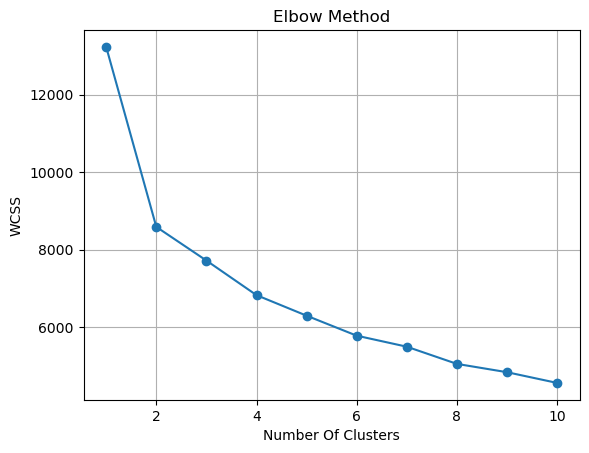

In [65]:
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [79]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
print(df['Cluster'].value_counts())

Cluster
0    931
1    698
2    576
Name: count, dtype: int64


In [81]:
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

               Income    Recency  Total Purchase  Total Spending  \
Cluster                                                            
0        70856.974221  50.123523       19.583244     1209.706767   
1        32252.181948  55.843840        6.173352      113.358166   
2        44004.953125  38.925347        8.984375      230.348958   

         marital_status  educational_level  
Cluster                                     
0              1.737916           2.437164  
1              1.653295           1.613181  
2              1.812500           3.265625  


# Visualizing Clusters For Insight

#### Cluster Profiles

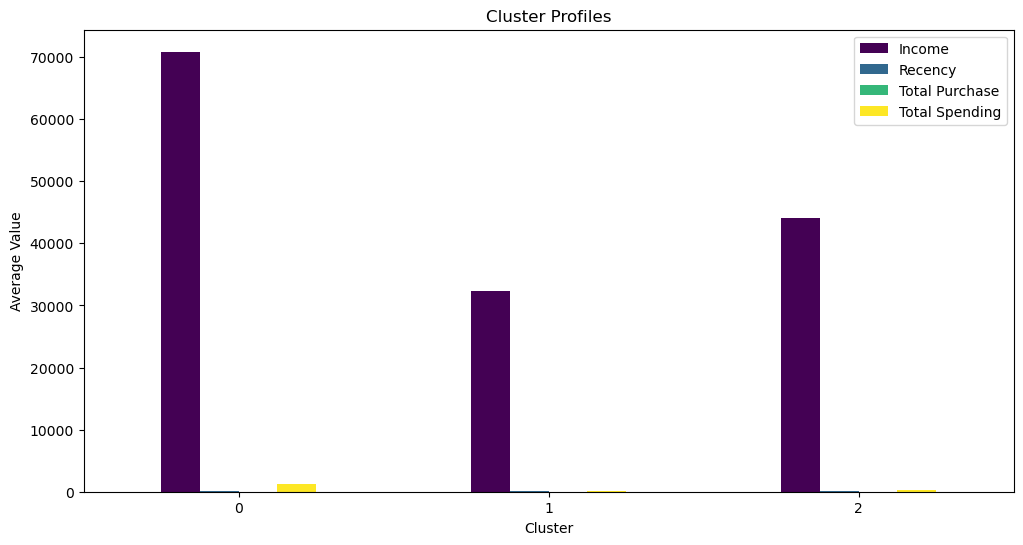

In [83]:
cluster_summary[['Income', 'Recency', 'Total Purchase', 'Total Spending']].plot(kind='bar', figsize=(12,6), colormap='viridis')
plt.title('Cluster Profiles')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()

#### Spending Distribution

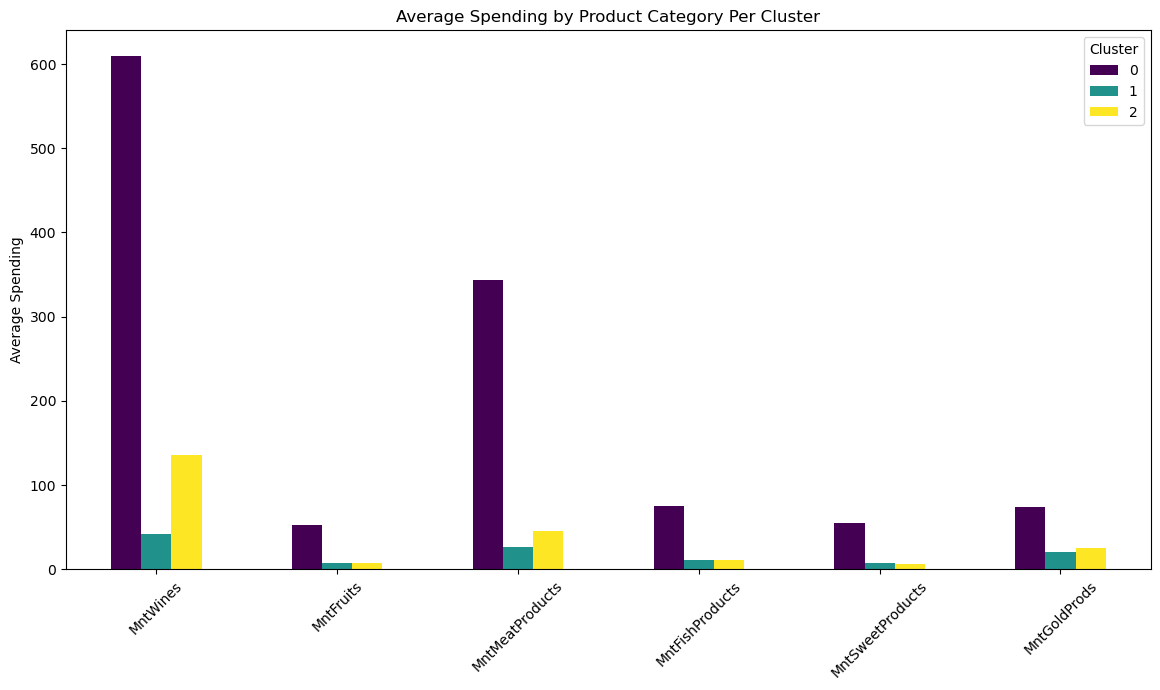

In [85]:
spending_features = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
cluster_spending = df.groupby('Cluster')[spending_features].mean()

cluster_spending.T.plot(kind='bar', figsize=(14,7), colormap='viridis')
plt.title('Average Spending by Product Category Per Cluster')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

#### Categorical Features

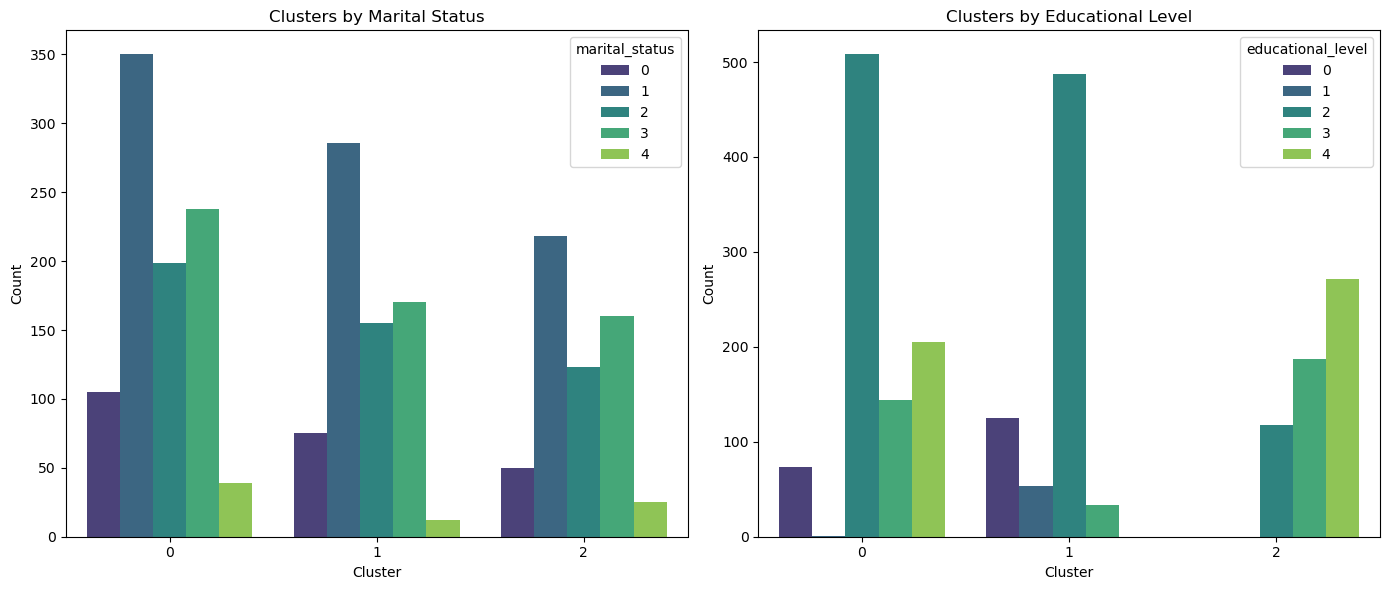

In [87]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
num_marital_status = df['marital_status'].nunique()
num_educatonal_level = df['educational_level'].nunique()

virdis_marital = sns.color_palette("viridis", n_colors=num_marital_status)
virdis_educational = sns.color_palette("viridis", n_colors=num_educatonal_level)

sns.countplot(ax = axes[0],x='Cluster', hue='marital_status', data=df, palette=virdis_marital)
axes[0].set_title('Clusters by Marital Status')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Count')

sns.countplot(ax = axes[1],x='Cluster', hue='educational_level', data=df, palette=virdis_educational)
axes[1].set_title('Clusters by Educational Level')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

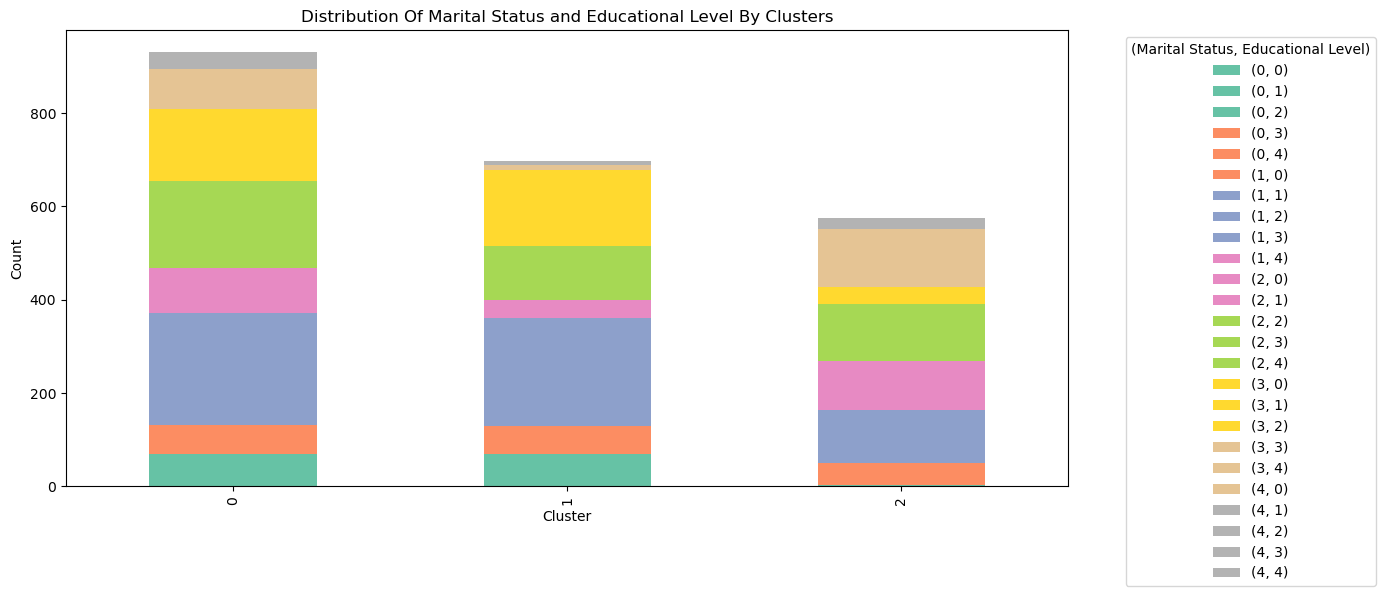

In [91]:
cluster_summary = df.groupby(['Cluster', 'marital_status', 'educational_level']).size().reset_index(name='Count')

pivot_table = cluster_summary.pivot_table(index=['Cluster'], columns=['marital_status', 'educational_level'], values='Count', aggfunc='sum', fill_value=0)

pivot_table.plot(kind='bar', stacked=True,figsize=(14,6), colormap='Set2')
plt.title('Distribution Of Marital Status and Educational Level By Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='(Marital Status, Educational Level)', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()